<a href="https://colab.research.google.com/github/acgowda/marketflow/blob/main/model_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import layers

from sklearn.model_selection import train_test_split

import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
df = pd.read_csv('/content/drive/Shareddrives/PIC 16B Project/stock_data3.csv')
df.head()

,Unnamed: 0,Date,close,open,high,low,volume,ma5,ma20,ma60,...,^GSPC-volume,^GSPC-ma5,^GSPC-ma20,^GSPC-ma60,^GSPC-ma200,^VIX-close,^VIX-ma5,^VIX-ma20,^VIX-ma60,^VIX-ma200
0,0,2017-10-24,1.0,1.435785,1.818259,1.506505,2.789887,1.173010,0.913128,0.575702,...,-0.424601,-0.892740,-0.926244,-1.018000,-1.247523,-0.883515,-0.982796,-1.106524,-1.127281,-1.431370
1,1,2017-10-25,0.0,1.706291,1.774853,1.727938,1.062202,1.348664,0.978270,0.604672,...,0.004575,-0.893885,-0.922728,-1.016060,-1.245152,-0.875529,-0.955746,-1.098106,-1.124602,-1.431607
2,2,2017-10-26,1.0,1.852573,1.813737,1.655021,0.535720,1.472645,1.032301,0.627990,...,-0.000665,-0.894359,-0.919196,-1.014071,-1.242806,-0.867542,-0.926597,-1.087275,-1.122205,-1.431570
3,3,2017-10-27,0.0,1.671184,1.639665,1.665758,-0.463551,1.594092,1.089682,0.650985,...,0.016668,-0.892726,-0.914866,-1.011456,-1.240250,-1.038682,-0.930561,-1.085480,-1.123709,-1.433151
4,4,2017-10-30,0.0,1.645529,1.581339,1.580316,0.057663,1.679793,1.131863,0.670935,...,-0.202383,-0.890540,-0.911799,-1.009151,-1.237797,-0.958817,-0.943853,-1.078981,-1.122604,-1.433814


In [4]:
X = df.drop(columns=['close','Unnamed: 0','Date'])
y = df['close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [5]:
model = tf.keras.models.Sequential([
    layers.Dense(64, input_shape=(36,), activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(2)
])

In [6]:
model.compile(optimizer = "adam",
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=20, batch_size = 64, 
                    shuffle = True, verbose=1)

Epoch 1/20
5871/5871 [==============================] - 27s 4ms/step - loss: 0.6780 - accuracy: 0.5655
Epoch 2/20
5871/5871 [==============================] - 15s 3ms/step - loss: 0.6493 - accuracy: 0.6110
Epoch 3/20
5871/5871 [==============================] - 14s 2ms/step - loss: 0.6350 - accuracy: 0.6276
Epoch 4/20
5871/5871 [==============================] - 14s 2ms/step - loss: 0.6278 - accuracy: 0.6356
Epoch 5/20
5871/5871 [==============================] - 15s 3ms/step - loss: 0.6228 - accuracy: 0.6420
Epoch 6/20
5871/5871 [==============================] - 14s 2ms/step - loss: 0.6189 - accuracy: 0.6450
Epoch 7/20
5871/5871 [==============================] - 14s 2ms/step - loss: 0.6169 - accuracy: 0.6472
Epoch 8/20
5871/5871 [==============================] - 14s 2ms/step - loss: 0.6144 - accuracy: 0.6499
Epoch 9/20
5871/5871 [==============================] - 14s 2ms/step - loss: 0.6133 - accuracy: 0.6512
Epoch 10/20
5871/5871 [==============================] - 14s 2ms/step - l

In [7]:
loss, accuracy = model.evaluate(X_test, y_test)
print('Test accuracy :', accuracy)

5032/5032 [==============================] - 10s 2ms/step - loss: 0.5842 - accuracy: 0.6813
Test accuracy : 0.6812716722488403


In [8]:
def plot_history(hist):
    plt.plot(hist.history["accuracy"], label = "training")
    # plt.plot(hist.history["val_accuracy"], label = "validation")
    plt.gca().set(xlabel = "epoch", ylabel = "accuracy")
    plt.legend()
    plt.show()

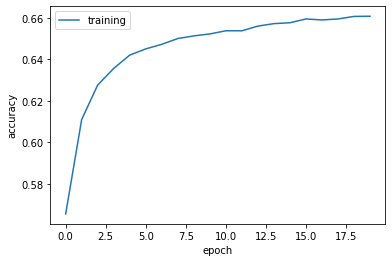

In [9]:
plot_history(history)

In [11]:
import pickle
with open('/content/drive/Shareddrives/PIC 16B Project/model.pkl' , 'wb') as f:
    pickle.dump(model, f)

INFO:tensorflow:Assets written to: ram://901f1856-ca7e-4480-ac37-40148b3fcaff/assets
